In [1]:
import pcn_batch as pb
import numpy as np
import csv
import pylab as plt
import os
import pandas as pd

# pima  = np.loadtxt("diabetes.csv", delimiter=",", skiprows=1)

pima = pd.read_csv("diabetes.csv")
pima

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


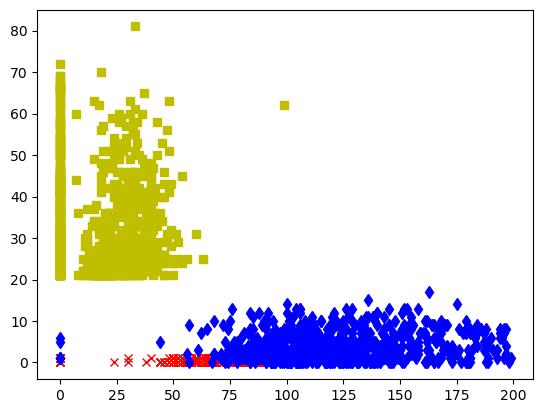

In [2]:
# Plot the data using DataFrame columns
plt.plot(pima['BloodPressure'], pima['Outcome'], "rx")  # Replace 'column2' and 'column8' with the appropriate column names
plt.plot(pima['Glucose'], pima['Pregnancies'], "bd")  # Replace 'column1' and 'column0' with the appropriate column names
plt.plot(pima['SkinThickness'], pima['Age'], "ys")  # Replace 'column3' and 'column7' with the appropriate column names

plt.show()

In [8]:
import numpy as np

class pcn:
    
    def __init__(self,inputs,targets):
        """ Constructor """
        # Set up network size
        if np.ndim(inputs) > 1:
            self.nIn = np.shape(inputs)[1]
        else: 
            self.nIn = 1
    
        if np.ndim(targets) > 1:
            self.nOut = np.shape(targets)[1]
        else:
            self.nOut = 1

        self.nData = np.shape(inputs)[0]
    
        # Initialise network
        self.weights = np.random.rand(self.nIn+1,self.nOut)*0.1-0.05

    def pcntrain(self,inputs,targets,eta,nIterations):
        """ Train the thing """    
        # Add the inputs that match the bias node
        inputs = np.concatenate((inputs, -np.ones((self.nData, 1))), axis=1)
    
        # Training
        for n in range(nIterations):
            for m in range(self.nOut):
                index = n % np.shape(inputs)[0]
                activation = sum(self.weights[:, m] * inputs[index])

                activation = 1 if activation > 0 else 0

                self.weights[:, m] += eta * (targets[index][m] - activation) * inputs[index]

                print("\nIteration:", n)
                print("Target Output:", targets[index][m])
                print("Predicted Output:", activation)
                print("Weights:")
                print(self.weights)

    def confmat(self,inputs,targets):
        """Confusion matrix"""
        # Add the inputs that match the bias node
        inputs = np.concatenate((inputs, -np.ones((self.nData, 1))), axis=1)
        outputs = np.dot(inputs, self.weights)
    
        nClasses = np.shape(targets)[1]

        if nClasses == 1:
            nClasses = 2
            outputs = np.where(outputs > 0, 1, 0)
        else:
            outputs = np.argmax(outputs, 1)
            targets = np.argmax(targets, 1)

        cm = np.zeros((nClasses, nClasses))
        for i in range(nClasses):
            for j in range(nClasses):
                cm[i, j] = np.sum((outputs == i) & (targets == j))

        print(cm)
        print(np.trace(cm) / np.sum(cm))

In [9]:
# Convert the DataFrame to numpy array for compatibility with the class functions
pima_array = pima.values

# Splitting the dataset into two halves for training and testing
half = len(pima_array) // 2
train_data = pima_array[:half, :8]
train_target = pima_array[:half, 8:9]
test_data = pima_array[half:, :8]
test_target = pima_array[half:, 8:9]


In [10]:
# Now, let's proceed with reading the data and executing the class functions
perceptron = pcn(train_data, train_target)
perceptron.pcntrain(train_data, train_target, 0.25, 100)
perceptron.confmat(test_data, test_target)



Iteration: 0
Target Output: 1.0
Predicted Output: 1
Weights:
[[-0.04570575]
 [ 0.03414341]
 [ 0.00341259]
 [-0.03450143]
 [ 0.0342286 ]
 [ 0.04144635]
 [-0.02096932]
 [ 0.03944926]
 [ 0.03037282]]

Iteration: 1
Target Output: 0.0
Predicted Output: 1
Weights:
[[ -0.29570575]
 [-21.21585659]
 [-16.49658741]
 [ -7.28450143]
 [  0.0342286 ]
 [ -6.60855365]
 [ -0.10871932]
 [ -7.71055074]
 [  0.28037282]]

Iteration: 2
Target Output: 1.0
Predicted Output: 0
Weights:
[[ 1.70429425]
 [24.53414341]
 [-0.49658741]
 [-7.28450143]
 [ 0.0342286 ]
 [-0.78355365]
 [ 0.05928068]
 [ 0.28944926]
 [ 0.03037282]]

Iteration: 3
Target Output: 0.0
Predicted Output: 1
Weights:
[[ 1.45429425e+00]
 [ 2.28414341e+00]
 [-1.69965874e+01]
 [-1.30345014e+01]
 [-2.34657714e+01]
 [-7.80855365e+00]
 [ 1.75306778e-02]
 [-4.96055074e+00]
 [ 2.80372816e-01]]

Iteration: 4
Target Output: 1.0
Predicted Output: 0
Weights:
[[ 1.45429425e+00]
 [ 3.65341434e+01]
 [-6.99658741e+00]
 [-4.28450143e+00]
 [ 1.85342286e+01]
 [ 2.9